In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [5]:
train = pd.read_csv(r"..\data\train.csv")
test = pd.read_csv(r"..\data\test.csv")

In [6]:
X = train.drop(columns = ["label"])
y = train.loc[:, "label"]

In [7]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

In [11]:
input_shape = (28, 28, 1)

In [9]:
num_classes = 10

In [24]:
model = keras.Sequential([
    layers.Input(shape = input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [27]:
X_train_array = X_train.values
X_valid_array = X_valid.values

In [28]:
X_train_reshaped = X_train_array.reshape(-1, 28, 28, 1)
X_valid_reshaped = X_valid_array.reshape(-1, 28, 28, 1)

Epoch 1/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.4652 - loss: 5.9396 - val_accuracy: 0.9151 - val_loss: 0.2838
Epoch 2/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.9278 - loss: 0.2350 - val_accuracy: 0.9557 - val_loss: 0.1533
Epoch 3/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.9635 - loss: 0.1187 - val_accuracy: 0.9671 - val_loss: 0.1124
Epoch 4/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.9773 - loss: 0.0747 - val_accuracy: 0.9698 - val_loss: 0.1012
Epoch 5/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9827 - loss: 0.0572 - val_accuracy: 0.9737 - val_loss: 0.0872
Epoch 6/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.9875 - loss: 0.0417 - val_accuracy: 0.9765 - val_loss: 0.0798
Epoch 7/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.9892 - loss: 0.0357 - val_accuracy: 0.9785 - val_loss: 0.0780
Epoch 8/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.9922 - loss: 0.0265 - val_accura

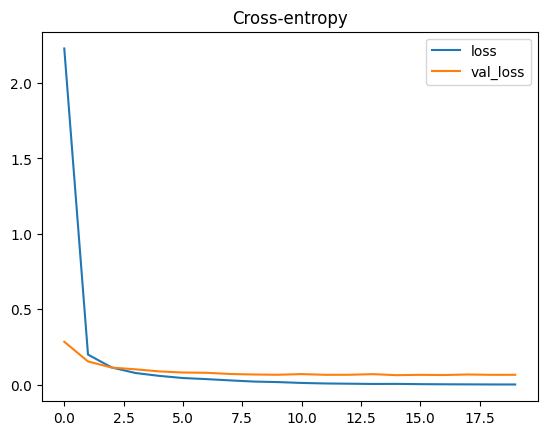

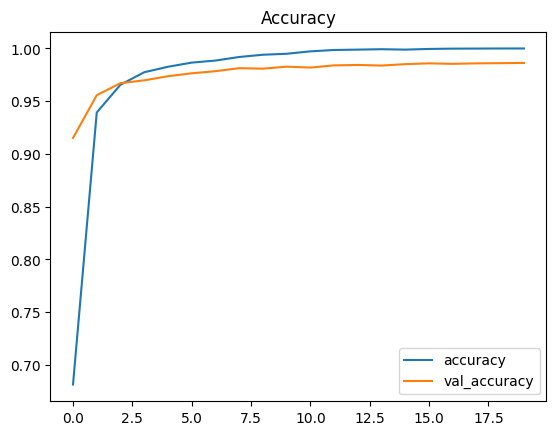

In [29]:
history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_valid_reshaped, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy");

In [31]:
test_array = test.values

In [32]:
test_reshaped = test_array.reshape(-1, 28, 28, 1)

In [33]:
predictions = model.predict(test_reshaped)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [35]:
predicted_labels = np.argmax(predictions, axis=1)

In [36]:
my_submission2 = pd.DataFrame({'ImageId': range(1, 28001), 'Label': predicted_labels})
my_submission2.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [37]:
my_submission2.to_csv("tensorflow2.csv", index=False)